# Grafos com NetworkX

A biblioteca [NetworkX](https://networkx.org/) (da linguagem Python) é uma ferramenta consolidada e bastante
utilizada para aplicações que lidam com grafos, incluindo aplicações de análise de redes sociais. Nesta parte
da atividade vamos ver alguns exemplos do uso básico da biblioteca, e fazer algumas tarefas simples, como
preparação para as tarefas de análise que faremos à frente.

NetworkX tem a capacidade de funcionar juntamente com a biblioteca de visualização matplotlib. Vamos usar
ambas para visualizar os exemplos:

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

Como acontece com outras bibliotecas da linguagem Python, é comum importar a biblioteca `networkx` com o nome
`nx` e a biblioteca `matplotlib.pyplot` (uma parte da matplotlib) como `plt`.

## Tipos de grafos

Usando NetworkX, podemos criar os tipos de grafos que encontramos nas aplicações:
- grafos direcionados
- grafos não-direcionados
- multi-grafos (direcionados ou não)

O tipo de grafo é escolhido durante a construção. Como exemplo, vamos criar um grafo não-direcionado e
armazená-lo em uma variável com nome `G`:

In [2]:
G = nx.Graph()

Usamos o construtor `Graph()` para grafos não-direcionados; se fosse um grafo direcionado, usaríamos
`DiGraph()`. Para multigrafos, usaríamos `MultiGraph()` e `MultiDiGraph()`. A biblioteca também
inclui geradores para criar certas topologias comuns de grafos.

Neste ponto, `G` é um grafo vazio, sem nós e sem arestas. Podemos adicionar os nós e arestas individualmente:

In [3]:
# adicionamos os nós 0, 1, 2, 3 e 4
G.add_node(0)
G.add_node(1)
G.add_node(2)
G.add_node(3)

# adicionamos algumas arestas
G.add_edge(0, 1)
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 0)

Dado esse grafo, podemos visualiza-lo usando `nx.draw()` e `plt.show()` (função da pyplot usada para mostrar
a figura atualmente sendo construída.

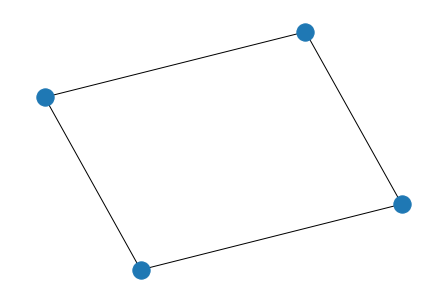

In [4]:
nx.draw(G)
plt.show()

Nesse caso, a função `nx.draw()` escolhe o layout do grafo, que pode ser controlado com algumas opções.
Por exemplo, podemos tentar um layout circular e incluir os identificadores dos nós:

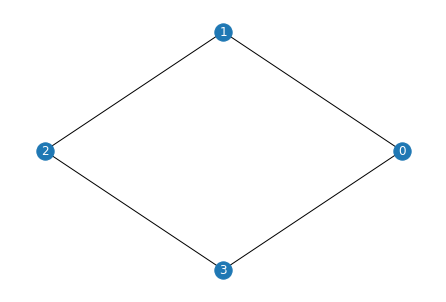

In [5]:
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, font_color="white")
plt.show()

No limite, podemos controlar precisamente a posição de cada nó, mas em geral isso não
é necessário.

Note que usamos números (de 0 a 3) como identificadores ou chaves dos nós. Em geral, podemos
usar vários tipos básicos da linguagem Python, incluindo números e strings. Na nossa rede social
de atores, serão usadas strings que identificam a pessoa unicamente no banco de dados do IMDb.

## Acessando nós

O grafo possui duas propriedades que possibilitam o acesso aos seus nós e arestas: `G.nodes`
e `G.edges`. Essas propriedades podem ser acessadas como um array ou dicionário em Python (internamente,
o grafo é representadopor um dicionário). Por exemplo

In [6]:
G.nodes[0]

{}

Isso mostra o "conteúdo" do nó 0. Esse nó não possui dados associados, apenas o identificador.

Nós (e arestas) também podem ter dados associados a eles. Por exemplo, vamos adicionar um atributo `nome` ao
nó 0:

In [7]:
G.nodes[0]["nome"] = "origem"
G.nodes[0]

{'nome': 'origem'}

Note que agora, quando consultamos o mesmo nó 0, obtemos um conteúdo que é o atributo `nome`, com
valor `origem`. Os dados associados a um nó também podem ser adicionados durante a criação do nó:

In [8]:
G.add_node(4, nome="terminal")
G.add_edge(0, 4)
G.nodes[4]

{'nome': 'terminal'}

Também podemos usar `G.nodes` para iterar por todos os nós do grafo, fazendo alguma ação
em cada nó. Por exemplo, podemos imprimir o identificador do nó:

In [9]:
for n in G.nodes():
    print(f"Nó com identificador {n}")

Nó com identificador 0
Nó com identificador 1
Nó com identificador 2
Nó com identificador 3
Nó com identificador 4


Também podemos obter os dados associados a cada nó, se quisermos fazer uma busca no
nó por algum atributo, por exemplo. Vamos criar um novo grafo com rotas entre
algumas cidades fictícias:

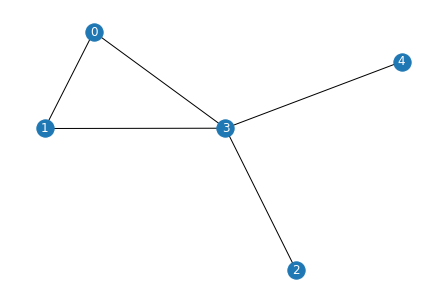

In [10]:
cidades = nx.Graph()
cidades.add_node(0, nome="Gotham")
cidades.add_node(1, nome="Metropolis")
cidades.add_node(2, nome="Arrakeen")
cidades.add_node(3, nome="Sigil")
cidades.add_node(4, nome="Atlantida")

cidades.add_edge(0, 1)
cidades.add_edge(0, 3)
cidades.add_edge(1, 3)
cidades.add_edge(2, 3)
cidades.add_edge(4, 3)

nx.draw(cidades, with_labels=True, font_color="white")
plt.show()

Agora digamos que queremos encontrar a cidade de Sigil, mas não sabemos seu identificador
no grafo. Podemos fazer uma busca por todos os nós e verificar qual possui o atributo
`nome` com valor igual a `Sigil`. Para obter os atributos dos nós, passamos o parâmetro
`data=True` para a função `nodes()` do grafo. Nesse caso o iterador vai gerar dois valores
por vez: o identificador do nó e os atributos do nó, coletados em um dicionário:

In [11]:
for n, d in cidades.nodes(data=True):
    if d["nome"] == "Sigil":
        print(f"O identificador de Sigil é {n}")

O identificador de Sigil é 3


## Acessando arestas

Arestas são representadas como pares entre os identificadores dos nós ligados por ela.
A propriedade `edges` do grafo contém todas as arestas, por exemplo no grafo das
cidades acima:

In [12]:
cidades.edges

EdgeView([(0, 1), (0, 3), (1, 3), (2, 3), (3, 4)])

Neste conjunto de arestas, podemos ver que existem arestas entre os nós 0 e 3, e entre os nós 2 e 3,
por exemplo. Com isso podemos encontrar os nós adjacentes (vizinhos) de um nó, por exemplo,
mas é mais prático fazer de outra forma, como veremos a seguir. Podemos adicionar atributos de
dados nas arestas usando a propriedade `edges`:

In [13]:
cidades.edges[0, 1]["rota"] = "estrada"
cidades.edges[3, 4]["rota"] = "portal inter-dimensional"

Podemos agora criar uma função que imprime que tipo de rota existe entre duas cidades,
se houver:

In [14]:
def encontra_cidade(cidade):
    for n, d in cidades.nodes(data=True):
        if d["nome"] == cidade:
            return n
    return None

def imprime_rota(cidade1, cidade2):
    no1 = encontra_cidade(cidade1)
    no2 = encontra_cidade(cidade2)
    if no1 and no2:
        print(f"A rota entre {cidade1} e {cidade2} é do tipo {cidades.edges[no1, no2]['rota']}")

imprime_rota("Sigil", "Atlantida")

A rota entre Sigil e Atlantida é do tipo portal inter-dimensional


## Vizinhos de um nó

A propriedade `neighbors()` lista todos os nós adjacentes de um nó. Por exemplo, vamos
ver todos os vizinhos do nó 0:

In [15]:
cidades.neighbors(0)

O valor retornado é um iterador da linguagem Python, que não lista diretamente os nós
vizinhos. Uma forma de ver quais são os vizinhos é transformar esse iterador em uma lista:

In [16]:
list(cidades.neighbors(0))

[1, 3]

Ou podemos usar o iterador para escrever um loop que vai visitar cada nó:

In [17]:
for v in cidades.neighbors(3):
    print(f"Nó {v} é vizinho do nó 3.")

Nó 0 é vizinho do nó 3.
Nó 1 é vizinho do nó 3.
Nó 2 é vizinho do nó 3.
Nó 4 é vizinho do nó 3.


# Atividades

## 1. Criação de um grafo

Usando a biblioteca NetworkX, crie um grafo (não-direcionado) com pelo menos 10 cidades que possuem
aeroportos para vôos comerciais (pode ser no Brasil ou qualquer país). Você pode usar como identificador
do nó um número pequeno simples, ou uma string contendo o código internacional do aeroporto
(JPA, REC, GRU, YYZ, etc). Crie arestas entre
dois nós se as cidades correspondentes estão ligadas por algum vôo direto. Por exemplo,
se tivermos nós correspondentes a João Pessoa e Recife, os nós devem ser ligados por uma
aresta, pois existe um vôo direto entre as duas cidades. Os nós devem possuir um atributo
`nome` que especifica o nome da cidade ou aeroporto.

**Opcional**: Adicione outros atributos nos nós (cidades), por exemplo a altitude em relação
ao nível do mar, ou a população da cidade.

**Opcional**: Adicione um atributo de dados nas arestas, contendo a distância em linha reta
entre as duas cidades.

In [4]:
aeroportos = nx.Graph()  

cidades =  {"JP": ["João Pessoa",817511],"RE": ["Recife",1555000],"BSB":["Brasilia",3094325],"SP":["São Paulo",12330000],
            "FOR":["Fortaleza",2687000],"RJ":["Rio de Janeiro",6748000],"MAC":["Maceió",1025000],"POA":["Porto Alegre",1492530],
            "TER":["Teresina",868075],"FLO":["Florianópolis",508826]}

for i in cidades:
    aeroportos.add_node(i, cidade = cidades[i][0], populacao = cidades[i][1])

passagens = {"JP":["RJ","SP"],"RE":["SP","RJ","POA","FOR"], "BSB":["SP","FOR","FLO"],
             "SP":["RJ","BSB","POA","FLO"], "FOR":["RE","SP","RJ"], "RJ":["JP","RE","SP","POA"],
             "MAC":["SP"],"POA":["SP","RJ","FLO"], "TER":["FOR"],"FLO":["POA"]}

for i in passagens:
    for j in passagens[i]:
        aeroportos.add_edge(i,j)

In [5]:
aeroportos.nodes()

NodeView(('JP', 'RE', 'BSB', 'SP', 'FOR', 'RJ', 'MAC', 'POA', 'TER', 'FLO'))

## 2. Visualização do grafo

Crie uma visualização do grafo construído, usando `nx.draw()`. Se quiser, altere as opções
para imprimir os identificadores dos nós, ou algum atributo como o nome (para isso vai ser
necessário pesquisar a documentação da biblioteca NetworkX).

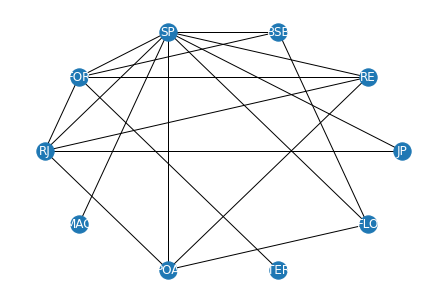

In [6]:
nx.draw(aeroportos, pos=nx.circular_layout(aeroportos), with_labels=True, font_color='white')
plt.show()

## 3. Varredura dos nós

Faça um loop que imprime cada nó do seu grafo, incluindo o nome de cada cidade (ou aeroporto).
Se tiver incluído outros atributos nos nós, imprima-os também.

**Opcional**: Se tiver adicionado algum atributo numérico nos nós (por exemplo, população), calcule
a soma (ou média) dos valores de todos os atributos e imprima o total ou a média no final do loop.

In [7]:
aeroportos.nodes['JP']

{'cidade': 'João Pessoa', 'populacao': 817511}

In [8]:
soma = 0

for node in aeroportos.nodes:
    print(f'Node: {node}')
    
    for key in aeroportos.nodes[node]:
        print(f'{aeroportos.nodes[node][key]}')
    
    soma += aeroportos.nodes[node]['populacao']
    print('')

print(f'Soma: {soma}\tMédia: {soma/len(aeroportos.nodes)} ')

Node: JP
João Pessoa
817511

Node: RE
Recife
1555000

Node: BSB
Brasilia
3094325

Node: SP
São Paulo
12330000

Node: FOR
Fortaleza
2687000

Node: RJ
Rio de Janeiro
6748000

Node: MAC
Maceió
1025000

Node: POA
Porto Alegre
1492530

Node: TER
Teresina
868075

Node: FLO
Florianópolis
508826

Soma: 31126267	Média: 3112626.7 


## 4. Busca nos nós

Crie uma função para buscar um nó pelo nome da cidade ou aeroporto, e retorne o identificador do nó,
se encontrado, ou `None` caso contrário. Crie outra função que
imprima o identificador do nó, se encontrado, ou imprima uma mensagem dizendo que não existe
um nó com esse nome, se não encontrado. Se houver outros atributos de dados no nó, imprima-os
também.

**Opcional**: Se houver algum atributo numérico nos nós, crie uma função para obter o
valor máximo (ou mínimo) do atributo numérico e imprima os dados do nó que possui esse
valor máximo (ou mínimo).

In [26]:
def busca_aeroporto(nome):
    for n, node in aeroportos.nodes(data=True):
        if node['cidade'] == nome:
            return n
    return None

def imprime_info_aeroporto(nome):
    node = busca_aeroporto(nome)
    
    if node == None:
        print('Não existe um nó com esse nome')    
        
        return True
    
    print(f'Identificador: {node}')
    
    for key in aeroportos.nodes[node]:
        print(f'{key}: {aeroportos.nodes[node][key]}')

def max_min():
    
    valor1 = 0
    valor2 = 1000000000000
    
    for node in aeroportos.nodes():
        
        if aeroportos.nodes[node]['populacao'] >= valor1:
            ind1 = node
            valor1 = aeroportos.nodes[node]['populacao']
            
        if aeroportos.nodes[node]['populacao'] <= valor2:
            ind2 = node
            valor2 = aeroportos.nodes[node]['populacao']
        
    print(f'Identificador max: {ind1}')
    
    for key in aeroportos.nodes[ind1]:
        print(f'{key}: {aeroportos.nodes[ind1][key]}')
    
    print('')  
    print(f'Identificador min: {ind2}')
    
    for key in aeroportos.nodes[ind2]:
        print(f'{key}: {aeroportos.nodes[ind2][key]}')

In [27]:
imprime_info_aeroporto('Porto Alegre')

Identificador: POA
cidade: Porto Alegre
populacao: 1492530


In [28]:
busca_aeroporto('Porto Alegre')

'POA'

In [29]:
max_min()

Identificador max: SP
cidade: São Paulo
populacao: 12330000

Identificador min: FLO
cidade: Florianópolis
populacao: 508826


## 5. Caminho entre nós

Selecione dois nós que não estão ligados por uma aresta. Usando chamadas à função
`neighbors` do grafo, encontre um caminho entre os dois nós.

**Opcional**: Crie uma função que, dados os nomes de duas cidades ou aeroportos,
encontra um caminho entre eles.

In [83]:
# vizinhos do próximo nó do caminho...

path = []

def path_nodes(G, source, target):
    
    if source in path:
        return
    
    path.append(source)
    
    if target in list(aeroportos.neighbors(source)):
        path.append(target)
        return path
    
    else:
        for vizinho in list(aeroportos.neighbors(source)):
            cam = path_nodes(G, vizinho, target) 
            
            if cam:
                return
        return
                    

In [84]:
path_nodes(aeroportos, 'JP','FOR')

In [85]:
path

['JP', 'RJ', 'FOR']

## 6. Varredura das arestas

Crie uma função que verifica se existe um vôo direto entre duas cidades ou aeroportos,
buscando pelo nome, retornando `True` se existe e `False` caso contrário.

**Opcional**: Caso tenha incluído o atributo com a distância entre as cidades, crie uma
função que retorna a distância entre as duas cidades, se houver um vôo direto entre elas,
ou `None` se não houver um vôo direto.

**Opcional**: Caso tenha incluído o atributo com a distância entre as cidades, e tenha
criado uma função no item anterior para encontrar uma caminho no grafo entre duas
cidades, crie uma função que usa o caminho encontrado e calcula a soma das distâncias
em linha reta entre as cidades no caminho.

In [72]:
# verifica se existe um vôo direto entre duas cidades
def existe_voo_direto(cidade1, cidade2):
    node1 = busca_aeroporto(cidade1)
    node2 = busca_aeroporto(cidade2)
    
    if (node1,node2) in aeroportos.edges:
        return True
    
    return False


In [73]:
existe_voo_direto('João Pessoa','São Paulo')

True